# Project: Salary Prediction

- **Project Name:** Salary Prediction
- **Project Type:** Regression
- **Author:** Dr. Saad Laouadi

**Copyright © Dr. Saad Laouadi**

In [1]:
# Importing necessary libraries
import os
import sys
from pathlib import Path
import time
import shutil
import requests

import numpy as np
import pandas as pd
from scipy.stats import pearsonr

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, mean_squared_error, r2_score

# Global settings
DATA_URL = "https://raw.githubusercontent.com/dr-saad-la/datasets/main/salary.csv"
DATA_PATH = "your/path" # If you downloaded the data use this variable

In [2]:
# the src module contains a set of functions that are used in this project
# you can refer to the source code, to just scroll down to the end of this notebook.
from src import *

**************************************************************
                       Data Description                       
**************************************************************
Dataset has: 30 rows, 2 features.
Column names: ['YearsExperience', 'Salary']
Missing values per column: {'YearsExperience': 0, 'Salary': 0}

Preview of the first few rows:
   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0
**************************************************************
                    Descriptive Statistics                    
**************************************************************
       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7

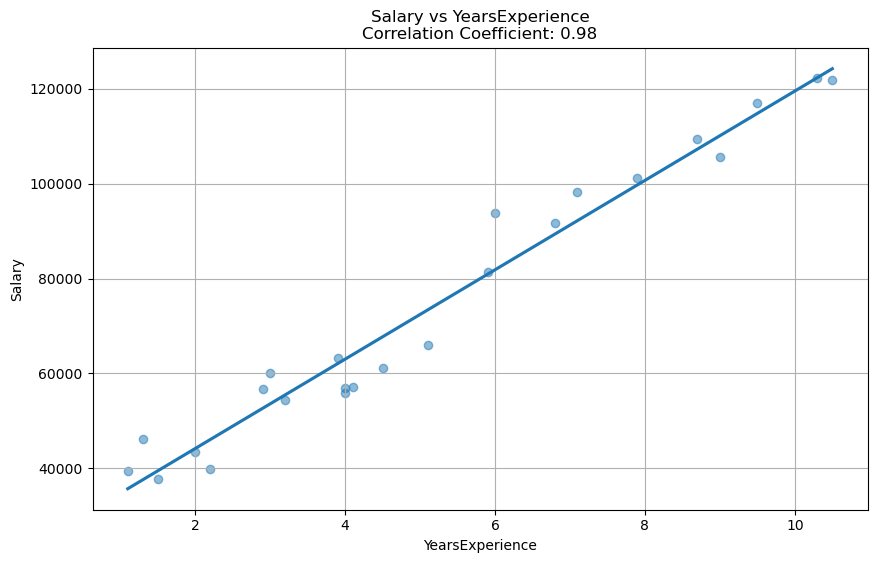

Model                    : LinearRegression()
Mean Squared Error       : 49830096.85591
Mean Absolute Error      : 6286.45383
Root Mean Squared Error  : 7059.04362
R^2 Score                : 0.902
   YearsExperience    Salary  PredictedSalary
0              9.6  112635.0    115790.210113
1              4.9   67938.0     71498.278095
2              8.2  113812.0    102596.868661
3              5.3   83088.0     75267.804224
4              3.2   64445.0     55477.792045


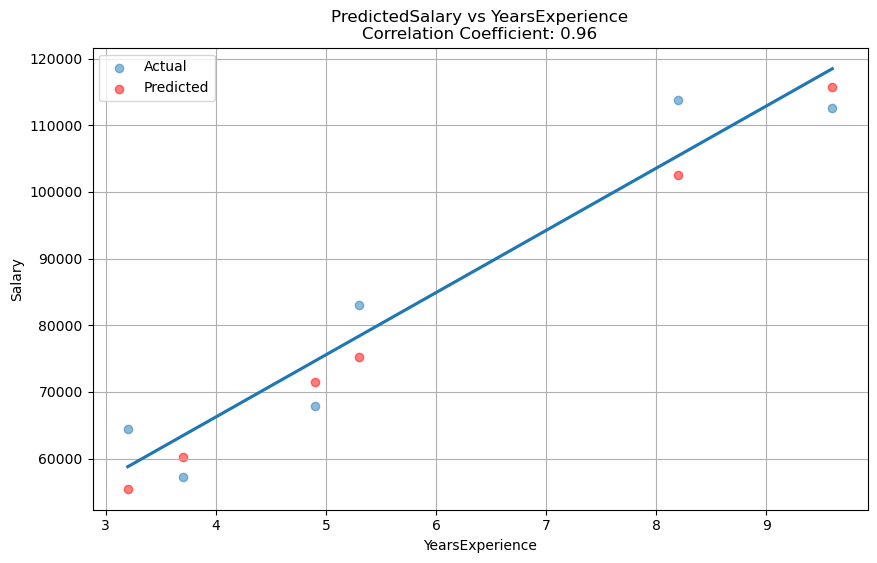


Process completed in 0.17 seconds.
**************************************************************


In [3]:
TARGET = "Salary"
IND_VAR = "YearsExperience"
PRED_TARGET = "Predicted Salary"

def main():
    """
    Main function to run the salary project.
    """
    try:
        start_time = time.time()

        # Read data from the URL
        data = read_data_from_url(DATA_URL)

        # Describe the dataset
        banner("*", 62, "Data Description")
        description = describe_dataset(data)

        end_time = time.time()
        elapsed_time = end_time - start_time

        # Print the dataset description
        print(f"Dataset has: {description['n_rows']} rows, {description['n_features']} features.")
        print(f"Column names: {description['column_names']}")
        print(f"Missing values per column: {description['missing_values']}")
        if 'preview_rows' in description:
            print("\nPreview of the first few rows:")
            print(description['preview_rows'])

        # Print descriptive statistics
        banner("*", 62, "Descriptive Statistics")
        print_descriptive_statistics(data)

        # Split the data into training and testing sets
        banner("*", 62, "Splitting data")
        X_train, X_test, y_train, y_test = split_data(data, target_name=TARGET)
        print("Training features:\n", X_train.head())
        print("Testing features:\n", X_test.head())
        print("Training labels:\n", y_train.head())
        print("Testing labels:\n", y_test.head())

        
        # Plot target vs independent variable
        banner("*", 62)
        plot_fit_reg_line(pd.concat([X_train, y_train], axis=1), TARGET, IND_VAR, show_correlation=True)

        # Train and evaluate the model
        result = train_and_evaluate_model(X_train, X_test, y_train, y_test)
        print(f"{'Model':<25}: {result['model']}")
        print(f"{'Mean Squared Error':<25}: {result['mse']:.5f}")
        print(f"{'Mean Absolute Error':<25}: {result['mae']:.5f}")
        print(f"{'Root Mean Squared Error':<25}: {result['rmse']:.5f}")
        print(f"{'R^2 Score':<25}: {result['r2']:.3f}")

        # Combine the datasets 
        result_df = concatenate_results(X_test, y_test, "PredictedSalary", result['predictions'])
        print(result_df.head())

        # model evaluation
        plot_fit_reg_line_with_predictions(result_df, TARGET, IND_VAR,
                                          predictions="PredictedSalary", show_correlation=True)

        print(f"\nProcess completed in {elapsed_time:.2f} seconds.")
        banner("*", 62)
    except (ValueError, FileNotFoundError) as e:
        print(f"Error: {e}")

if __name__ == "__main__":
    main()

## The Source code for the poject

In [4]:
"""
    This module contains a set of function to perform salary predictions project. 
"""
def banner(ban_char, nban_char, title=None):
    if not isinstance(ban_char, str) or len(ban_char) != 1:
        raise ValueError("ban_char must be a single character string.")
    
    if not isinstance(nban_char, int) or nban_char <= 0:
        raise ValueError("nban_char must be a positive integer.")

    if title is not None:
        print(ban_char * nban_char)
        print(title.center(nban_char))
        print(ban_char * nban_char)

    if title is None:
        print(ban_char * nban_char)

def download_data(url, save_path):
    try:
        response = requests.get(url)
        if response.status_code == 200:
            with open(save_path, 'wb') as f:
                f.write(response.content)
            print(f"Data downloaded successfully and saved at: {save_path}")
            return True
        else:
            print(f"Failed to download data. Status code: {response.status_code}")
            return False
    except Exception as e:
        print(f"Error during download: {str(e)}")
        raise e


def read_data_from_url(url):
    try:
        df = pd.read_csv(url)
        return df
    except Exception as e:
        raise ValueError(f"Error reading data from URL: {str(e)}")


def describe_dataset(data, preview=True):
    if isinstance(data, str):
        try:
            df = pd.read_csv(data)
        except FileNotFoundError as fnf_error:
            raise FileNotFoundError(f"File not found: {data}") from fnf_error
    elif isinstance(data, pd.DataFrame):
        df = data
    else:
        raise ValueError("Unsupported data type. Expected either a file path (str) or pandas DataFrame.")
    n_rows, n_features = df.shape

    description = {
        'n_rows': n_rows,
        'n_features': n_features,
        'column_names': df.columns.tolist(),
        'missing_values': df.isnull().sum().to_dict()
    }

    if preview and n_rows > 0:
        description['preview_rows'] = df.head()

    return description

def print_descriptive_statistics(df):
    descriptive_stats = df.describe(include='all')
    print(descriptive_stats)


def plot_fit_reg_line(data, target_name, ind_name, show_correlation=False):
    if isinstance(data, str):
        df = pd.read_csv(data)
    elif isinstance(data, pd.DataFrame):
        df = data
    else:
        raise ValueError("Unsupported data type. Expected either a file path (str) or pandas DataFrame.")

    if target_name not in df.columns or ind_name not in df.columns:
        raise ValueError(f"Columns {target_name} and/or {ind_name} not found in the dataset.")

    plt.figure(figsize=(10, 6))
    sns.regplot(x=df[ind_name], y=df[target_name], ci=None, scatter_kws={'alpha':0.5})

    if show_correlation:
        correlation_coef, _ = pearsonr(df[ind_name], df[target_name])
        plt.title(f'{target_name} vs {ind_name}\nCorrelation Coefficient: {correlation_coef:.2f}')
    else:
        plt.title(f'{target_name} vs {ind_name}')

    plt.xlabel(ind_name)
    plt.ylabel(target_name)
    plt.grid(True)
    plt.show()
    

def split_data(data, target_name, test_size=0.2, random_state=42):
    if isinstance(data, str):
        df = pd.read_csv(data)
    elif isinstance(data, pd.DataFrame):
        df = data
    else:
        raise ValueError("Unsupported data type. Expected either a file path (str) or pandas DataFrame.")

    if target_name not in df.columns:
        raise ValueError(f"Column {target_name} not found in the dataset.")
    
    X = df.drop(columns=[target_name])
    y = df[target_name]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    return X_train, X_test, y_train, y_test


def train_and_evaluate_model(X_train, X_test, y_train, y_test):
    model = LinearRegression()

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return {
        "predictions": y_pred,
        'model': model,
        'mse': mse,
        'mae': mae,
        'rmse': rmse,
        'r2': r2
    }


def concatenate_results(X_test, y_test, predicted_label, predictions):
    if not isinstance(y_test, pd.DataFrame):
        y_test = y_test.to_frame()

    result = pd.concat([X_test.reset_index(drop=True), y_test.reset_index(drop=True)], axis=1)
    result[predicted_label] = predictions

    return result

def plot_fit_reg_line_with_predictions(df, target_name, ind_name, predictions, show_correlation=False):
    if target_name not in df.columns or ind_name not in df.columns:
        raise ValueError(f"Columns {target_name} and/or {ind_name} not found in the dataset.")
    
    plt.figure(figsize=(10, 6))
    sns.regplot(x=df[ind_name], y=df[target_name], ci=None, scatter_kws={'alpha':0.5}, label='Actual')
    
    # Overlay the predicted values
    plt.scatter(df[ind_name], df[predictions], color='red', alpha=0.5, label='Predicted')

    if show_correlation:
        correlation_coef, _ = pearsonr(df[ind_name], df[target_name])
        plt.title(f'{predictions} vs {ind_name}\nCorrelation Coefficient: {correlation_coef:.2f}')
    else:
        plt.title(f'{predictions} vs {ind_name}')

    plt.xlabel(ind_name)
    plt.ylabel(target_name)
    plt.legend()
    plt.grid(True)
    plt.show()